<a href="https://colab.research.google.com/github/essiesalari/Mall-Customers-ML/blob/main/scratchpad.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Mall Customers ML Project**

## Import Libraries and Dataset

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
# Clone the GitHub repository
!git clone https://github.com/essiesalari/Mall-Customers-ML

%cd Mall-Customers-ML

!unzip Mall_Customers.zip

Cloning into 'Mall-Customers-ML'...
remote: Enumerating objects: 15, done.
remote: Counting objects: 100% (15/15), done.
remote: Compressing objects: 100% (12/12), done.
remote: Total 15 (delta 3), reused 2 (delta 0), pack-reused 0
Receiving objects: 100% (15/15), 5.46 KiB | 5.46 MiB/s, done.
Resolving deltas: 100% (3/3), done.
/content/Mall-Customers-ML/Mall-Customers-ML/Mall-Customers-ML/Mall-Customers-ML/Mall-Customers-ML
Archive:  Mall_Customers.zip
  inflating: Mall_Customers.csv      


In [13]:
# Read the data into Pandas DataFrame
df = pd.read_csv('Mall_Customers.csv')
df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


## EDA

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [16]:
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
CustomerID,200.0,NaN,NaN,NaN,100.5,57.879185,1.0,50.75,100.5,150.25,200.0
Genre,200,2,Female,112,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,200.0,NaN,NaN,NaN,38.85,13.969007,18.0,28.75,36.0,49.0,70.0
Annual Income (k$),200.0,NaN,NaN,NaN,60.56,26.264721,15.0,41.5,61.5,78.0,137.0
Spending Score (1-100),200.0,NaN,NaN,NaN,50.2,25.823522,1.0,34.75,50.0,73.0,99.0


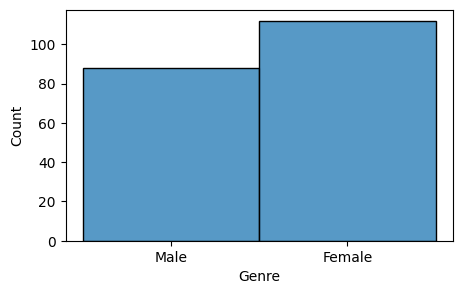

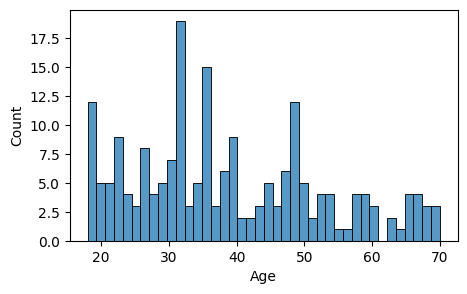

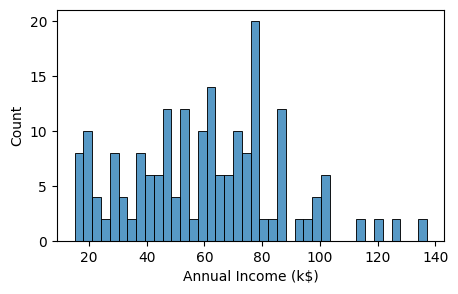

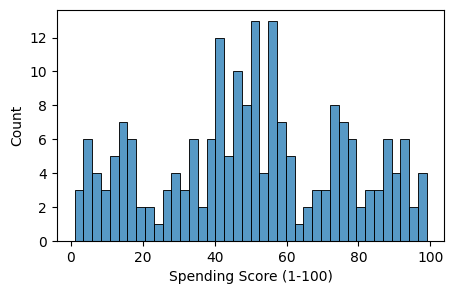

In [33]:
features = ['Genre', 'Age', 'Annual Income (k$)','Spending Score (1-100)']

for feature in features:
  plt.figure(figsize=(5,3))
  sns.histplot(data=df[feature], bins=40)
  plt.show()

## Correlations

<ipython-input-34-361e19bff1e9>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


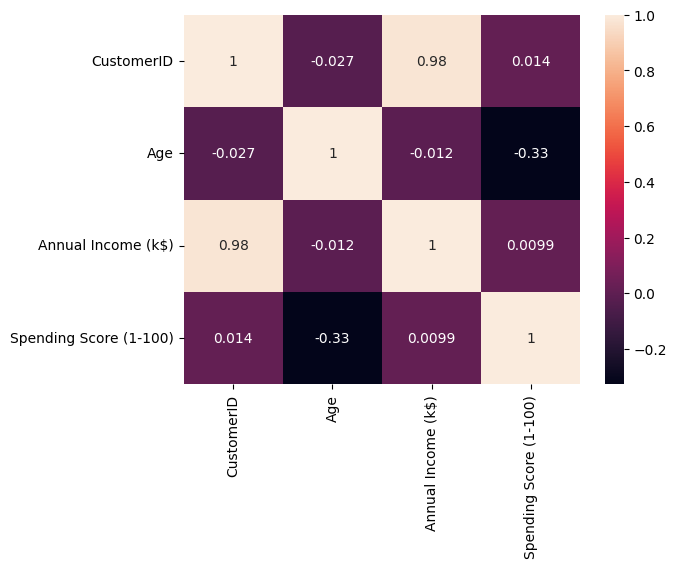

In [34]:
# Visualaize the correlations
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True);

## Preprocessing

In [42]:
# Drop Unnessesary Columns
df_encode = df[['Genre', 'Age', 'Annual Income (k$)','Spending Score (1-100)']]

# Encode Categorical Fields
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_encode['Genre'] = le.fit_transform(df_encode['Genre'])
df_encode

<ipython-input-42-421dc820198b>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_encode['Genre'] = le.fit_transform(df_encode['Genre'])


,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40
...,...,...,...,...
195,0,35,120,79
196,0,45,126,28
197,1,32,126,74
198,1,32,137,18


In [43]:
# Handel Outliers
from scipy import stats
threshold = 3
for col in ['Age', 'Annual Income (k$)','Spending Score (1-100)']:
  z_score = stats.zscore(df_encode[col])
  outliers = np.abs(z_score) > threshold
  print(f'# outliers in {col}: {outliers.sum()}')

# outliers in Age: 0
# outliers in Annual Income (k$): 0
# outliers in Spending Score (1-100): 0


## Scaling

In [45]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
df_enco_scl = sc.fit_transform(df_encode)

## ML Models